In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("D:/Udemy-GenAI/Social_Network_Ads.csv")
dataset.sample(5)

,Age,EstimatedSalary,Purchased
142,35,59000,0
206,55,130000,1
195,34,43000,0
32,21,16000,0
8,25,33000,0


In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


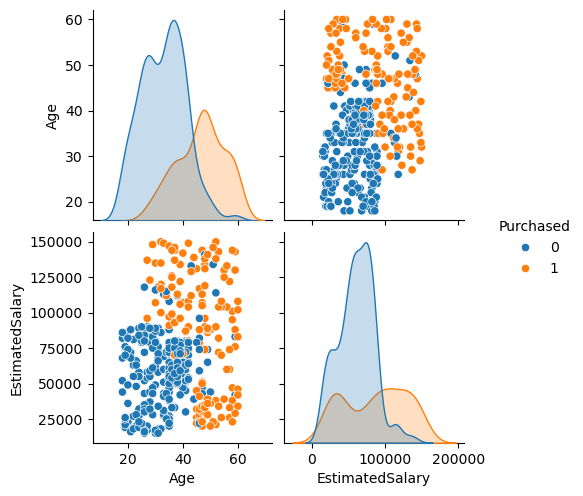

In [5]:
sns.pairplot(dataset,hue='Purchased')
plt.show()

In [6]:
x=dataset.iloc[:,:-1]
y=dataset['Purchased']

In [7]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.score(x_test,y_test)*100

91.25

In [23]:
knn.score(x_train,y_train)*100

92.5

In [26]:
knn.predict([[55,130000]])

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [19]:
for i in range(1,30):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train),knn1.score(x_test,y_test))

1 0.996875 0.85
2 0.915625 0.8625
3 0.925 0.9125
4 0.91875 0.925
5 0.909375 0.925
6 0.909375 0.9
7 0.91875 0.9375
8 0.90625 0.925
9 0.9125 0.9375
10 0.90625 0.925
11 0.909375 0.925
12 0.9125 0.925
13 0.915625 0.925
14 0.90625 0.925
15 0.90625 0.925
16 0.9 0.925
17 0.90625 0.925
18 0.9 0.925
19 0.909375 0.925
20 0.9 0.9375
21 0.903125 0.925
22 0.9 0.9375
23 0.903125 0.9375
24 0.89375 0.9375
25 0.9 0.9375
26 0.89375 0.9375
27 0.89375 0.925
28 0.8875 0.9375
29 0.8875 0.9375


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


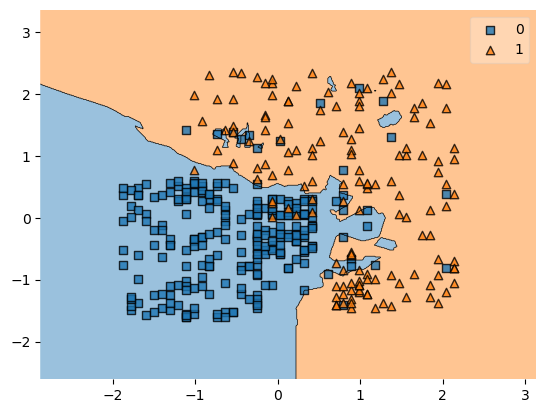

In [25]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()

Post Purning

In [17]:
for i in range(1,20):
    dc2=DecisionTreeClassifier(max_depth=i)
    dc2.fit(x_train,y_train)
    print(dc2.score(x_train,y_train),dc2.score(x_test,y_test))

0.821875 0.9
0.91875 0.9125
0.91875 0.9125
0.93125 0.9125
0.934375 0.9
0.95 0.8625
0.96875 0.85
0.975 0.85
0.98125 0.85
0.984375 0.85
0.990625 0.8375
0.990625 0.8375
0.99375 0.8375
0.996875 0.8375
0.996875 0.8375
0.996875 0.8375
0.996875 0.8375
0.996875 0.8375
0.996875 0.8375


In [13]:
from sklearn.tree import DecisionTreeClassifier

dc1=DecisionTreeClassifier(criterion="entropy")
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
dc1.score(x_test,y_test)*100

83.75

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


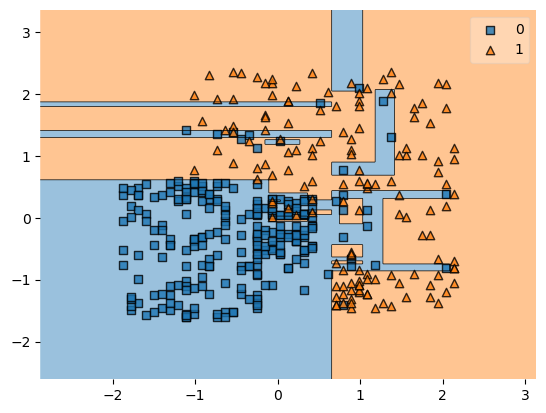

In [15]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dc1)
plt.show()

[Text(0.4642857142857143, 0.9166666666666666, 'x[0] <= 0.654\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.23809523809523808, 0.75, 'x[1] <= 0.61\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.35119047619047616, 0.8333333333333333, 'True  '),
 Text(0.09523809523809523, 0.5833333333333334, 'x[0] <= -0.11\ngini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.047619047619047616, 0.4166666666666667, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[1] <= 0.404\ngini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.09523809523809523, 0.25, 'x[1] <= -0.066\ngini = 0.165\nsamples = 66\nvalue = [60, 6]'),
 Text(0.047619047619047616, 0.08333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.38095238095238093, 0.5833333333333334, '

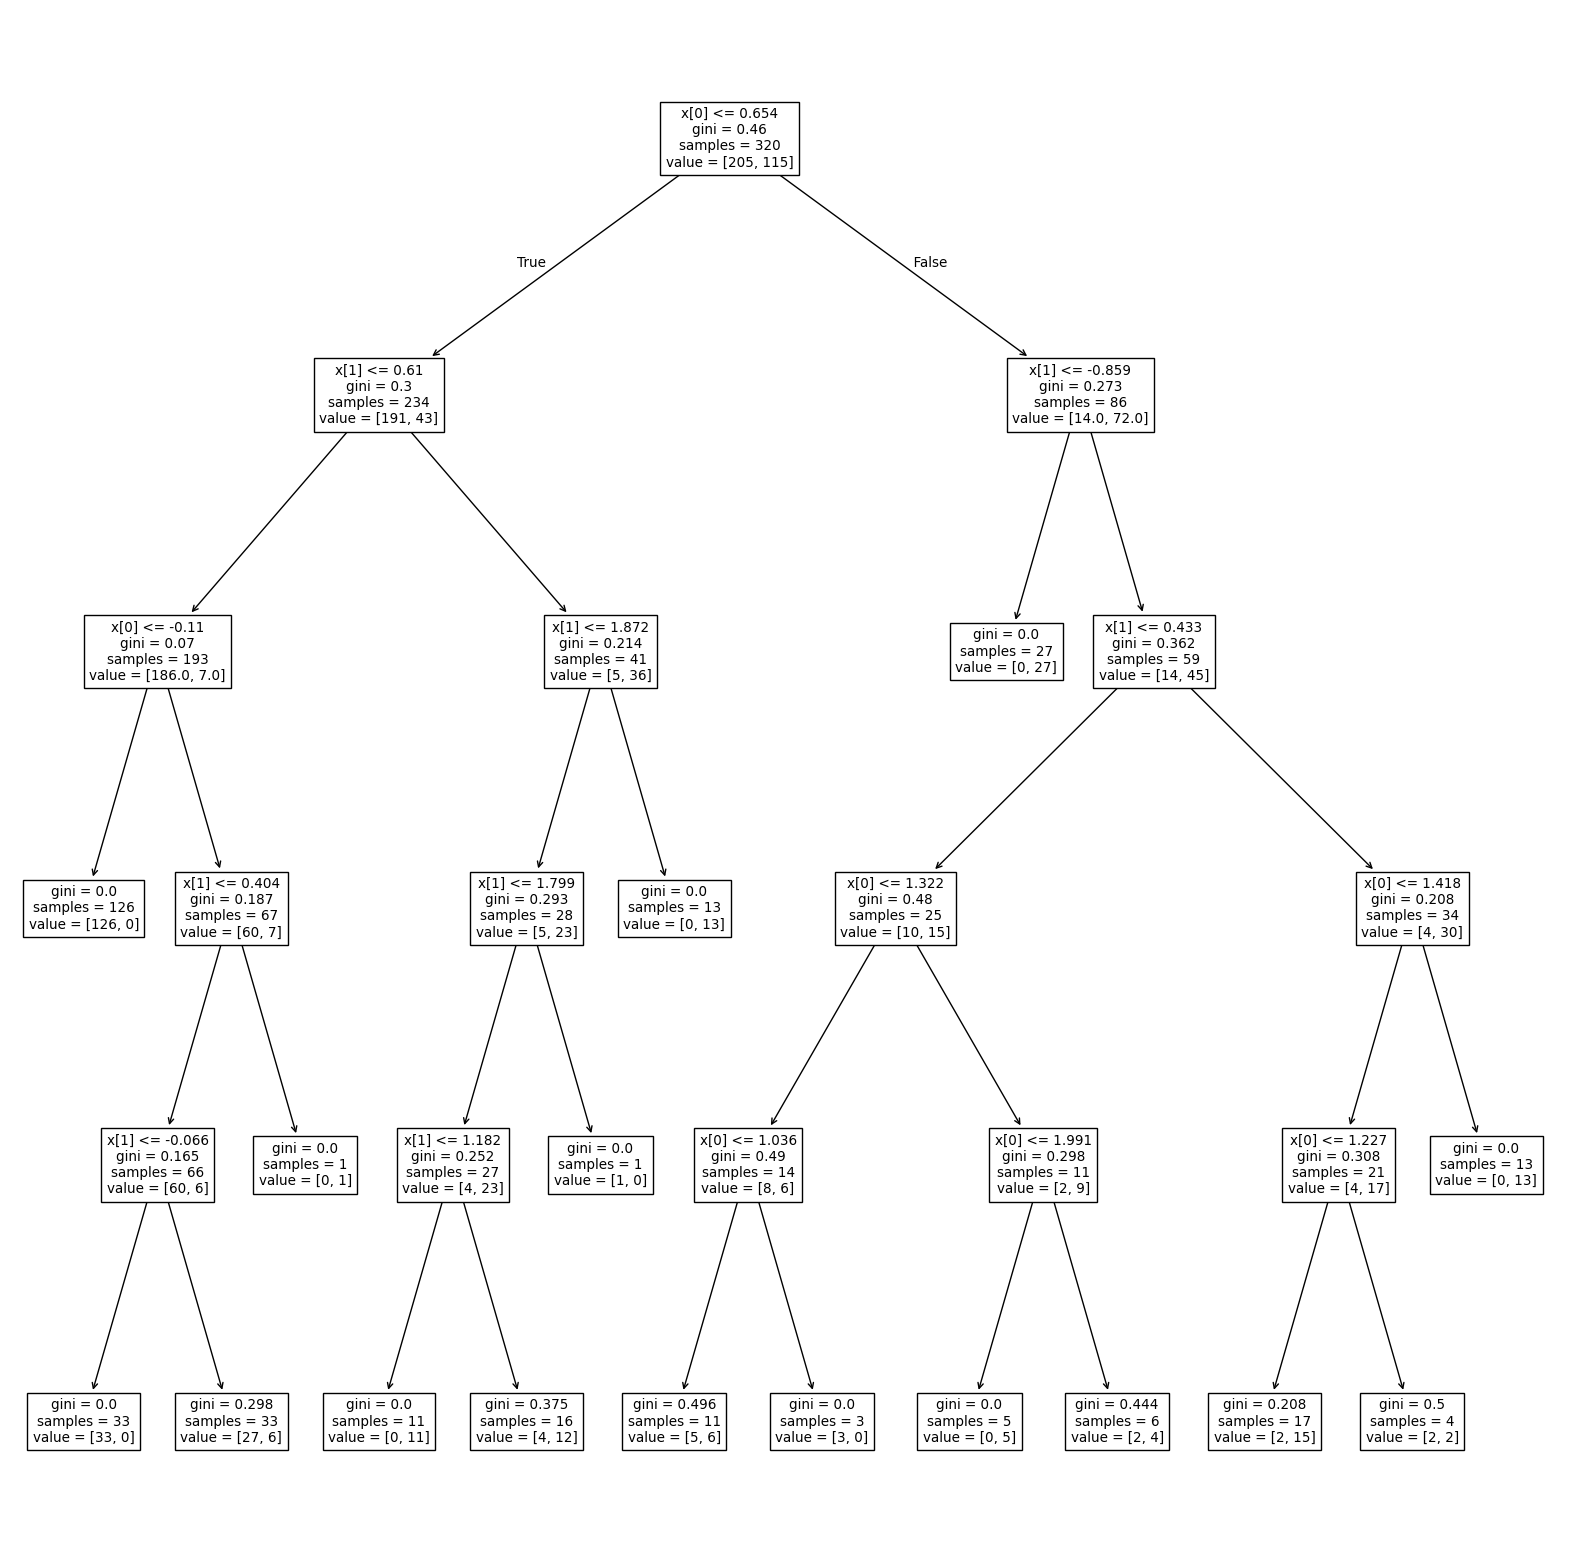

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dc)